# Mac에서 jupyter 환경에 R 추가하기
## Introduction
- R을 위한 interactive IDE(aka. IRkernel)을 구성하는 방법을 설명합니다.
- 기본적으로 R, python, jupyter notebook 및 lab 환경이 설치되어있다고 가정합니다.
- 이 글을 통해
  - IRkernel을 jupyter 환경에 연동시키는 방법을 알 수 있습니다.
  - jupyter 환경에서 R로 코딩하고 실행시키는 방법을 알 수 있습니다.

### 사전 환경
- Apple M1 Pro
- macOS 12.6 (Monterey)
- python 3.10.8
  - jupyterlab 3.4.4
- R 4.2.1
  - RStudio 2022.07.1

### Table of Contents
1. IRkernel 설정하기
2. Jupyter 환경에서 R 사용하기
3. (Optional) IRkernel을 편하게 사용하기 위한 jupyterlab extension 설치하기

## 1. IRkernel 설정하기
IRkernel은 그 이름에서 예상할 수 있듯이 IPython kernel과 유사한 기능을 지원하기 위한 R 패키지입니다.  
설치하는 방법은 아래 IRkernel 공식 페이지에서 확인할 수 있습니다.
- [irkernel.github.io](https://irkernel.github.io/installation/)
- [IRkernel repo](https://github.com/IRkernel/IRkernel)

사실 이 글도 위 내용을 번역한 것 이상은 아니고,  
나중에 환경 설정 같은거 찾기 귀찮을 거 같아서 모아놓으려 합니다.

아래 순서에 맞게 잘 따라하면 쉽게 설치할 수 있습니다.

### 1-1. CRAN을 통해 IRkernel 설치하기
R이 설치되어 있다면 IRkernel 역시 R 패키지인 만큼, CRAN을 통해 설치하는 것이 가장 쉽습니다.
- 우선 Rstudio 같은 R 콘솔을 실행하고  
- 아래 명령어를 입력해서 `IRkernel`을 설치합니다.
```R
install.packages('IRKernel')
```

### 1-2. Jupyter에서 실행시킬 수 있게 설정하기
- 터미널에서 R을 실행하고 아래 옵션에 맞게 명령어를 입력합니다.

#### 기본 명령어
```R
library('IRkernel')  
IRkernel::installspec()
```
- 이 명령어로 kernel spec을 설치합니다. 

#### system-wide하게 설치하기
```R
IRkernel::installspec(user = FALSE) 
```
- `user=False` 옵션을 추가해서 전체 유저에게 보이게(system-wide) 설정할 수 있습니다.

#### name, displayname 설정하기
```R
IRkernel::installspec(name = 'ir34', displayname = 'R 3.4')
```
- 이 옵션으로 kernel 이름과 display 이름을 설정할 수 있습니다.
    - `name`은 jupyter에서 커널을 관리할 때 주로 활용되는 이름입니다.
        - ex. jupyter console --kernel=ir34
    - `displayname`은 jupyter GUI 화면에서 주로 보이는 이름입니다.

## 2. Jupyter 환경에서 R 사용하기
이제 1-2에서 설정한 IRkernel을 통해 jupyter 환경에서 실행시켜볼 수 있습니다.

### 2-1. Jupyter notebook
일단 jupyter 환경의 가장 기본 IDE인 노트북으로 어떻게 실행되는지 확인하겠습니다.

- 새로운 노트북을 만들 때 드롭다운에 R이 있는 것을 확인할 수 있습니다.

![Image](./pics/create_notebook_with_R_kernel.png)

- 이걸 통해 노트북을 생성하면 R이 실행되고 있는 것을 노트북 화면 오른쪽 위에서 확인할 수 있습니다.

![Image](./pics/execute_R_jupyter_notebook.png)

- 노트북 파일은 jupyter notebook(.ipynb) 형태로 저장됩니다.
- Rstudio에서 사용하는 키보드 단축키가 여기서도 가능합니다.
  - `<-` for `alt + '-'`
  - `%>%` for `cmd/ctrl + shift + 'M'`
- 하지만, shift+tab을 활용해서 툴팁 도움말을 보는 기능은 없습니다. (아래 lab에서는 있음.)

### 2-2. jupyter lab
물론 jupyter lab 환경에서도 R 사용이 가능합니다.

- 똑같이 R 노트북(.ipynb)을 만들수도 있고,
- R 스크립트(.R)를 짜거나, interactive한 형태인 R 콘솔을 실행시킬 수도 있습니다.

![Image](./pics/create_notebook_with_R_kernel_lab.png)

- lab 환경에서는 shift+tab을 통해서 함수에 대한 툴팁 도움말을 볼 수 있습니다.
- 하지만, 이번엔 키보드 단축키가 안 됩니다.
    - 아래에서 extension을 까는 방법을 소개하겠습니다.

### run R code on jupyter

Jupyter에서 R 코드를 실행시켰을 때 결과가 어떻게 보이는지 확인해보겠습니다.  
아래 테스트하기 위한 간단한 코드가 있습니다. (random walk)

In [1]:
num_iter <- 1e5
current <- 0
positions <- rep(0, num_iter)

for (i in 1:num_iter){
    ## flip coin to move up or down
    random_walk <- sample(c(-1, 1), size=1)
    
    # update postion
    current <- current + random_walk
    positions[i] <- current
}

In [2]:
# show first 20 positions
positions[1:20]

[1] -1 -2 -3 -4 -3 -4 -5 -6 -7 -8 -9 -8 -7 -8 -9 -8 -7 -6 -7 -8

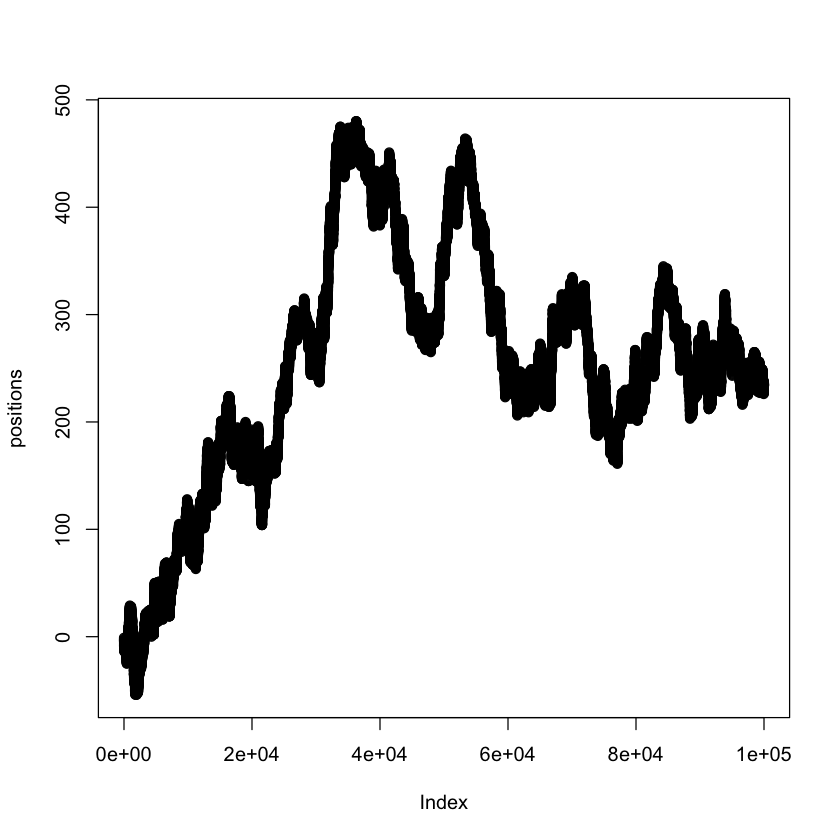

In [3]:
# plotting
plot(positions)

### (Optional) IRkernel을 편하게 사용하기 위한 jupyterlab extension 설치하기
- 단축키가 안먹는 슬픔은 extension 설치를 통해 해결할 수 있습니다.
  - 다만, 아무 extension나 설치하면 위험할 수 있으니 믿을만한지 확인하고 설치하는 것이 좋습니다.
- lab 화면 왼쪽의 퍼즐 모양(extension)을 누르고 text-shortcuts을 검색해서 설치할 수 있습니다.
![Image](pics/search_jupyterlab_extension.png)
- But! 갓 lab을 세팅한 환경에서는 extension 설치가 안된다.

![Image](pics/error_msg_for_npm.png)

- 잘 읽어보면 node.js, npm을 설치하라고 나옵니다.
- 참고로 node.js는 javascript(js)를 위한 웹 개발 프레임워크이고, npm은 js를 위한 패키지 매니저입니다.

#### installing node.js
- [ref: jupyterlab docs](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)
- 공식 문서를 쭉 읽다보면 node.js를 설치하는 방법이 나옵니다.
- 저는 nodejs를 직접 다운 받아서 설치했습니다.
- nodejs 설치가 완료된 후 해당 extension 설치를 다시 시도하면 에러 없이 잘 설치되는 것을 확인할 수 있습니다.